In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news-detection/true.csv
/kaggle/input/fake-news-detection/fake.csv


In [65]:
true_news_file_path="../input/fake-news-detection/true.csv"
fake_news_file_path="../input/fake-news-detection/fake.csv"
df_true=pd.read_csv(true_news_file_path)
df_fake=pd.read_csv(fake_news_file_path)

In [66]:
df_fake.keys()

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [67]:
print("\033[1mTrue news\033[0m")
display(df_true.head())
print("\033[1mFake news\033[0m")

display(df_fake.head())

True news


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Fake news


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [68]:
print("True news:")
display(df_true.isna().sum())
print()
print("Fake news:")
display(df_fake.isna().sum())

True news:


title      0
text       0
subject    0
date       0
dtype: int64


Fake news:


title      0
text       0
subject    0
date       0
dtype: int64

In [69]:
## labeling the true(1) and fake(0) data
df_true["label"]=1
df_fake["label"]=0
## true
display(df_true.head(2))
## fake 
display(df_fake.head(2))

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0


In [70]:
## combining both data to train the model
df_news=pd.concat([df_true,df_fake],ignore_index=True)
# suffled the concated datasets randomly and also removes  the old index
df_news=df_news.sample(frac=1).reset_index(drop=True) 
df_news


,title,text,subject,date,label
0,SNOPES IMPLODES! Liberal “Fact-Checker” Turns ...,Where s George Soros when his top fact check...,left-news,"Jul 24, 2017",0
1,U.N. starting to gather testimony on Myanmar v...,GENEVA (Reuters) - U.N. investigators have sta...,worldnews,"September 19, 2017",1
2,WIKILEAKS PROVES Hillary Gave Weapons To ISIS,Remember when Rand Paul drilled Hillary Clinto...,politics,"Jul 31, 2016",0
3,INFAMOUS ROMANIAN HACKER Tells FOX News Host H...,"Of course, America s favorite criminal candida...",left-news,"May 4, 2016",0
4,U.S. House to vote on non-nuclear Iran sanctio...,WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,"October 20, 2017",1
...,...,...,...,...,...
44893,Hungary not planning to move Israeli embassy t...,BUDAPEST (Reuters) - Hungary is not planning t...,worldnews,"December 11, 2017",1
44894,Trump's antitrust pick meets with Elizabeth Wa...,WASHINGTON (Reuters) - Senator Elizabeth Warre...,politicsNews,"September 6, 2017",1
44895,SECOND TWIN FALLS SEXUAL ASSAULT CASE…Mohammed...,Donald Trump was clearly on to something when ...,politics,"Aug 11, 2016",0
44896,BREAKING: KEY PERSON In Clinton Scandal Emerge...,Hillary and Bill Clinton knew when Hillary los...,politics,"Aug 24, 2016",0


In [71]:
## taking text,label col for training the model
X_input=df_news['text']
y_input=df_news['label']


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(ngram_range=(2,2),stop_words='english',max_features=5000)
X_input=vectorizer.fit_transform(X_input)

In [75]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X_input,y_input,test_size=0.25,random_state=88)
rf=RandomForestClassifier(random_state=0).fit(X_train,y_train)

In [78]:
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)
train_accuracy=accuracy_score(y_train,y_pred_train)
test_accuracy=accuracy_score(y_test,y_pred_test)
print("Training accuracy score {:.2f}".format(train_accuracy))
print("Testing accuracy score {:.2f}".format(test_accuracy))

Training accuracy score 1.00
Testing accuracy score 0.98


In [131]:
# classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_test, output_dict=True)
report_df=pd.DataFrame(report)
report_df

,0,1,accuracy,macro avg,weighted avg
precision,0.985221,0.973178,0.979421,0.979199,0.979484
recall,0.975332,0.983916,0.979421,0.979624,0.979421
f1-score,0.980251,0.978518,0.979421,0.979384,0.979425
support,5878.000000,5347.000000,0.979421,11225.000000,11225.000000


* precistion->How many predicted positives were actually correct?
* recall->How many actual positives were correctly predicted?
* F1-Score->Balance between Precision & Recall
* Support->Number of actual samples per class

Text(0.5, 0, ' Numerical importance score')

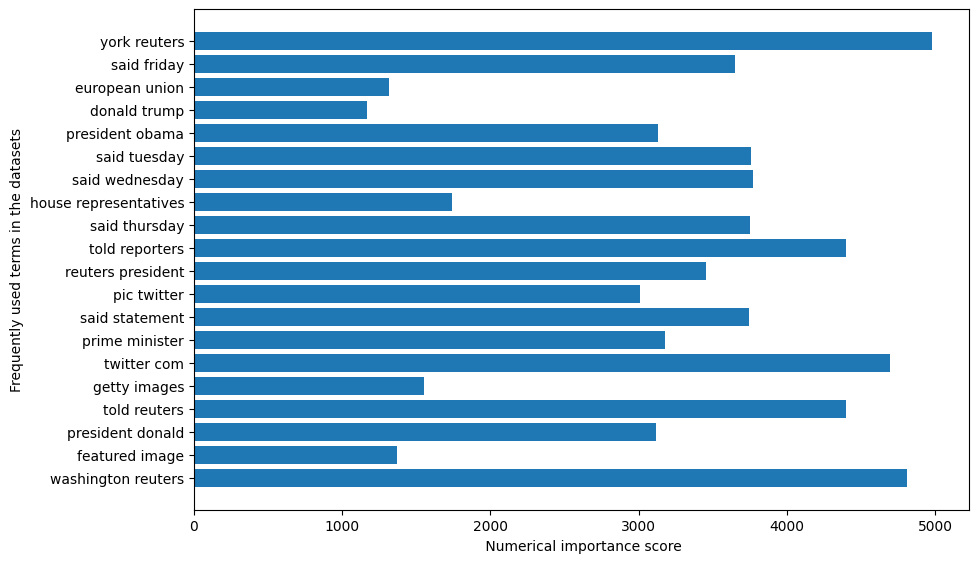

In [129]:
# stores the importanct words learned during vectorization
feature_names = vectorizer.get_feature_names_out()
#contain the numerical scores for each word
importances = rf.feature_importances_

sorted_indices=np.argsort(importances)[::-1][:20]
imp_feature_names=feature_names[sorted_indices]
plt.figure(figsize=(10,6.5))
plt.barh(imp_feature_names,sorted_indices)
plt.ylabel("Frequently used terms in the datasets")
plt.xlabel(" Numerical importance score")

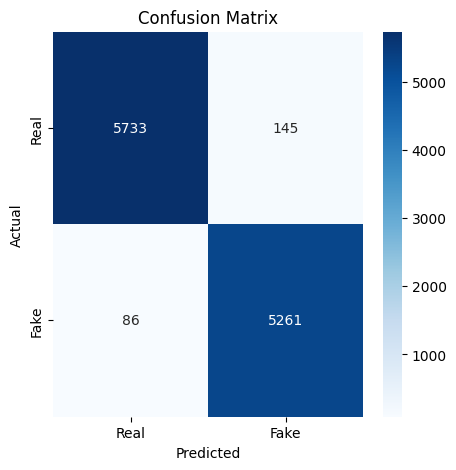

In [132]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)


plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
